In [1]:
pacman::p_load(tidyverse, readr, survival, pROC, geepack, summarytools, webshot, geepack, corrplot, tidyverse, lsr, polycor)
ggplot2::theme_set(theme_bw(base_size = 14))

dados <- read_csv("/home/ramon/Dropbox/prograd/extrator/survival/ze_final.csv")
names(dados)

Parsed with column specification:
cols(
  .default = col_double(),
  centro = col_character(),
  turno = col_character(),
  grau = col_character()
)

See spec(...) for full column specifications.



[1] "centro"           "codigoInep"       "turno"            "grau"            
 [5] "sexo"             "is_cotista"       "gap"              "idade"           
 [9] "is_outra_cidade"  "matricula"        "time"             "event"           
[13] "periodoIngresso"  "semestreIngresso" "semestreLetivo"   "start"           
[17] "n_rep"            "n_repf"           "n_apr"            "n_tra"           
[21] "n_total"          "cum_rep"          "cum_repf"         "cum_apr"         
[25] "cum_tra"          "cum_n_total"      "mediaFinal"       "cum_media_final" 
[29] "ira"              "p_n_rep"          "p_n_repf"         "p_n_apr"         
[33] "p_n_tra"          "p_cum_rep"        "p_cum_repf"       "p_cum_apr"       
[37] "p_cum_tra"

In [2]:
attr(dados, 'spec') <- NULL

dados$grau <- as.factor(dados$grau)
dados$turno <- as.factor(dados$turno)

dados$sexo <- as.factor(dados$sexo)
levels(dados$sexo) <- c("mulher", "homem")

dados$is_cotista <- as.factor(dados$is_cotista)
levels(dados$is_cotista) <- c("não cotista", "cotista")

print(dfSummary(dados), file = 'res.html', headings = FALSE)
webshot("res.html", vwidth = 1200)

Switching method to 'browser'

Output file written: /home/ramon/Dropbox/prograd/extrator/jupyter/res.html

PhantomJS not found. You can install it with webshot::install_phantomjs(). If it is installed, please make sure the phantomjs executable can be found via the PATH variable.



NULL

# Correlação - Covariáveis Time-varying

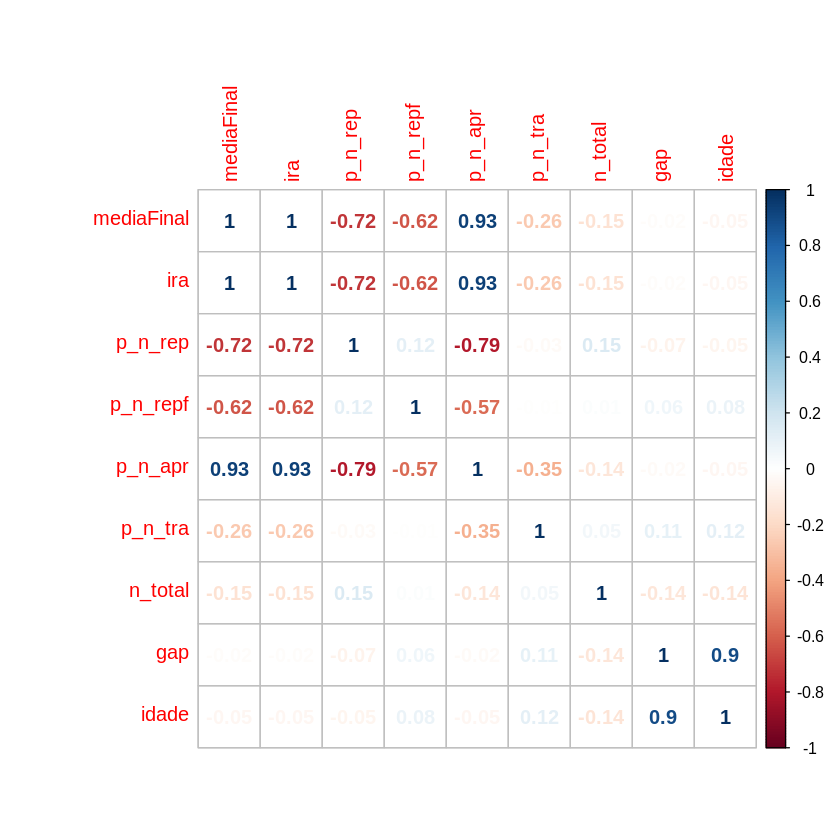

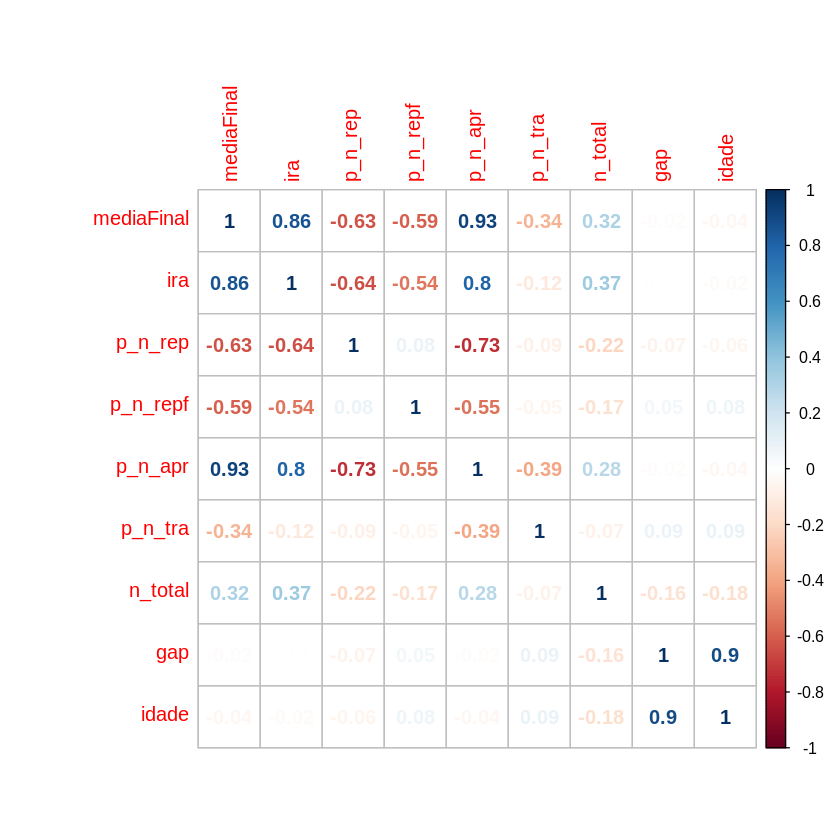

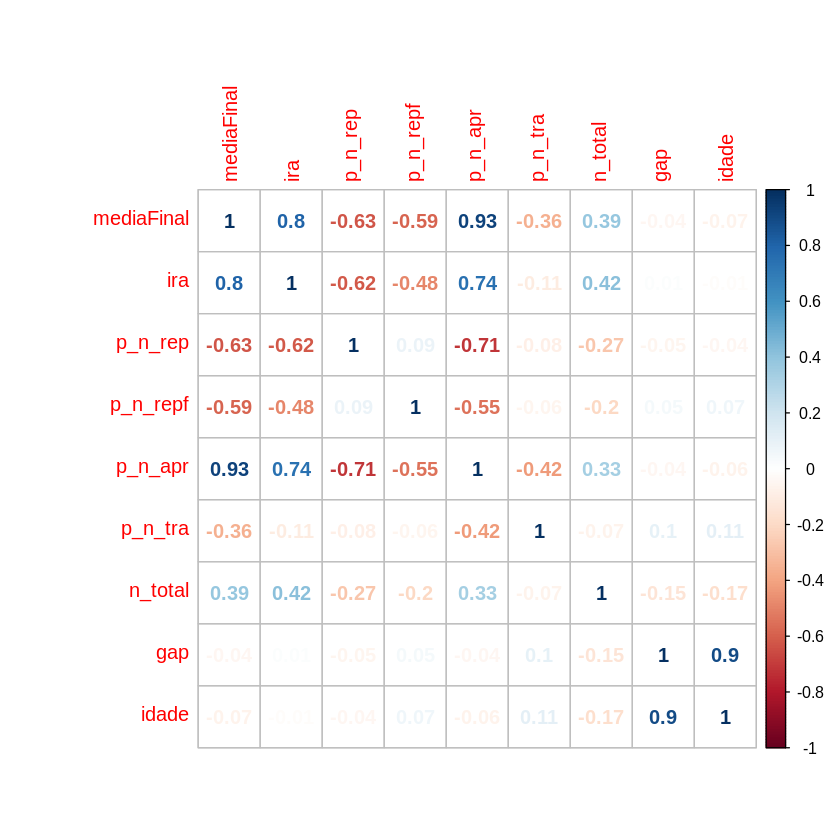

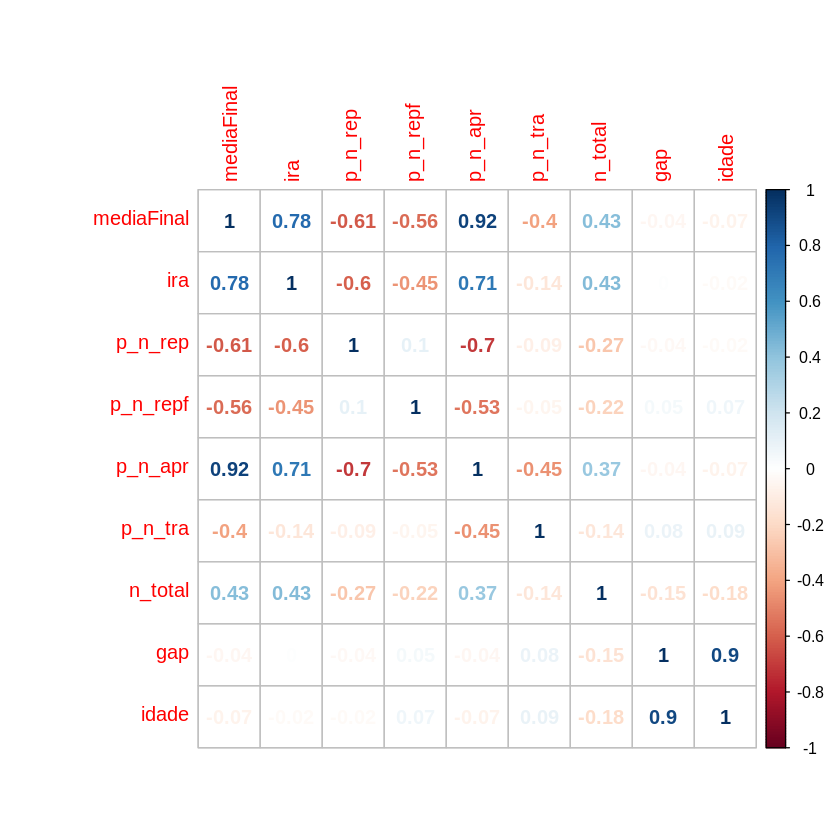

In [3]:
cat_cols =  c('centro', 'sexo', 'is_cotista', 'semestreIngresso', 'semestreLetivo')
#num_cols = c('n_rep', 'n_repf', 'n_apr', 'n_tra', 'n_total', 'cum_rep', 'cum_repf', 'cum_apr', 'cum_tra', 'cum_n_total', 'mediaFinal', 'cum_media_final', 'ira', 'p_n_rep', 'p_n_repf', 'p_n_apr', 'p_n_tra', 'p_cum_rep', 'p_cum_repf', 'p_cum_apr', 'p_cum_tra')

num_cols = c('mediaFinal', 'ira', 'p_n_rep', 'p_n_repf', 'p_n_apr', 'p_n_tra', 'n_total', 'gap', 'idade')
#num_cols = c('mediaFinal', 'ira', 'p_cum_rep', 'p_cum_repf', 'p_cum_apr', 'p_cum_tra', 'n_total', 'gap', 'idade')

for(t in 2:max(dados$time)){
    dados.time = subset(dados, time==t)    
    corrplot(cor(dados.time[num_cols], use='complete.obs'), method="number")
}

# Correlação - Covariáveis Categóricas

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(x)` instead of `x` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(y)` instead of `y` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



                  x                y chisq_pval  cramV
1            centro             grau     0.0000 0.5980
2            centro       is_cotista     0.0000 0.0467
3            centro semestreIngresso     0.0000 0.1044
4            centro   semestreLetivo     0.0090 0.0158
5            centro             sexo     0.0000 0.2113
6            centro            turno     0.0000 0.7960
7              grau       is_cotista     0.0000 0.0338
8              grau semestreIngresso     0.0000 0.1082
9              grau   semestreLetivo     0.0000 0.0185
10             grau             sexo     0.0000 0.0750
11             grau            turno     0.0000 0.3936
12       is_cotista semestreIngresso     0.0230 0.0087
13       is_cotista   semestreLetivo     0.0483 0.0075
14       is_cotista             sexo     0.4378 0.0030
15       is_cotista            turno     0.0000 0.0256
16 semestreIngresso   semestreLetivo     0.0000 0.2095
17 semestreIngresso             sexo     0.0000 0.0290
18 semestr

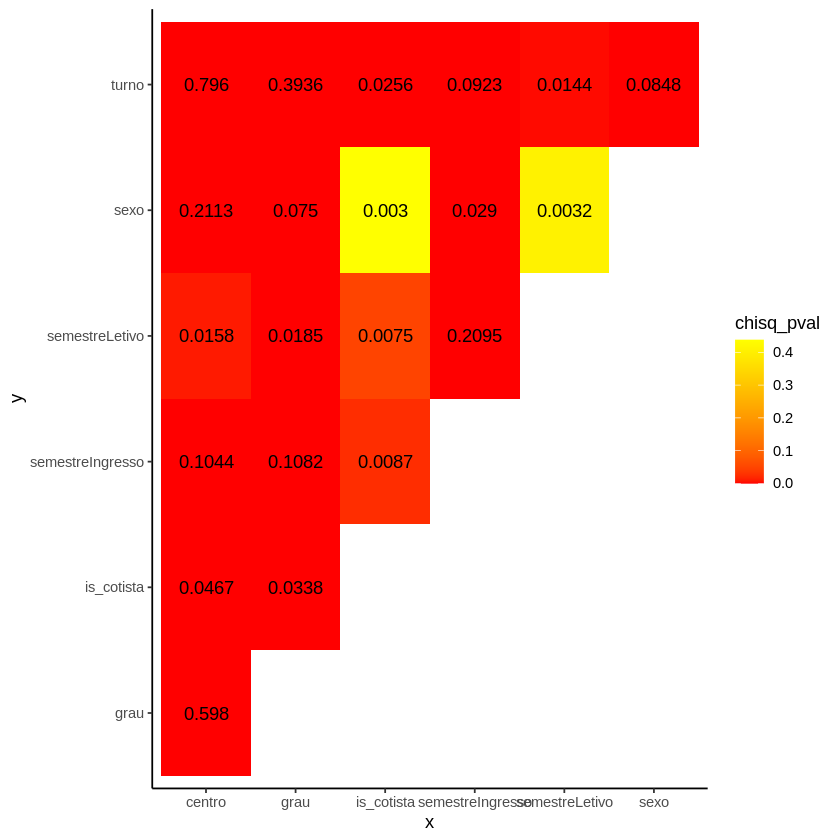

In [4]:
# function to get chi square p value and Cramers V

cat_cols =  c('centro', 'turno', 'grau', 'sexo', 'is_cotista', 'semestreIngresso', 'semestreLetivo')


df = dados[cat_cols]

f = function(x,y) {
    tbl = df %>% select(x,y) %>% table()
    chisq_pval = round(chisq.test(tbl)$p.value, 4)
    cramV = round(cramersV(tbl), 4) 
    data.frame(x, y, chisq_pval, cramV) }

# create unique combinations of column names
# sorting will help getting a better plot (upper triangular)
df_comb = data.frame(t(combn(sort(names(df)), 2)), stringsAsFactors = F)

# apply function to each variable combination
df_res = map2_df(df_comb$X1, df_comb$X2, f)

print(df_res)

# plot results
df_res %>%
  ggplot(aes(x,y,fill=chisq_pval))+
  geom_tile()+
  geom_text(aes(x,y,label=cramV))+
  scale_fill_gradient(low="red", high="yellow")+
  theme_classic()

In [5]:
#aov(dados$sexo ~ dados$n_rep)

#aov(dados$centro ~ dados$n_rep)

#print(cor(dados$sexo, dados$n_rep, use='complete.obs'))

# Centro de Ensino

`summarise()` regrouping output by 'time' (override with `.groups` argument)



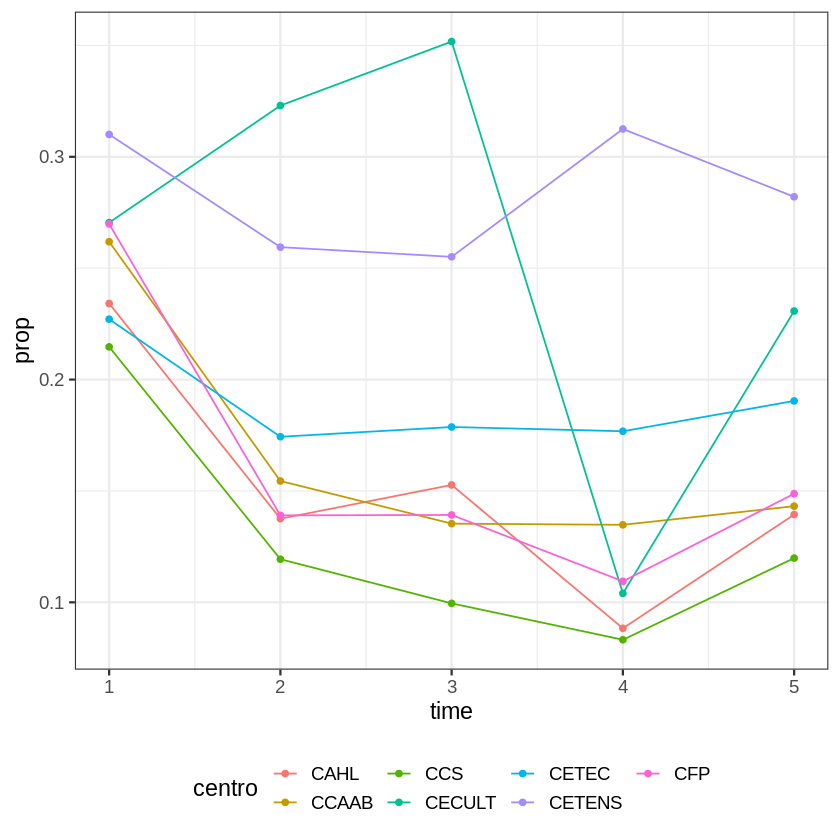

In [6]:
dados %>% group_by(time, centro) %>% summarize(prop=mean(event)) %>% ggplot(aes(x=time,
color=centro, y=prop)) + geom_line() + geom_point() + theme(legend.position = "bottom")

# Grau do Curso

`summarise()` regrouping output by 'time' (override with `.groups` argument)



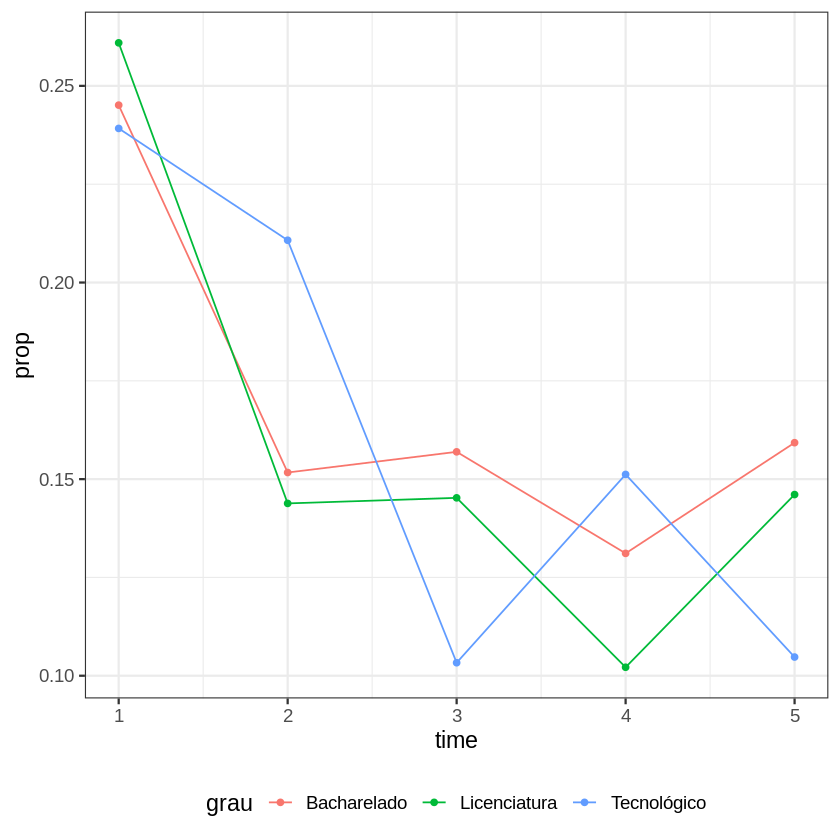

In [7]:
dados %>% group_by(time, grau) %>% summarize(prop=mean(event)) %>% ggplot(aes(x=time,
color=grau, y=prop)) + geom_line() + geom_point() + theme(legend.position = "bottom")

# Turno

`summarise()` regrouping output by 'time' (override with `.groups` argument)



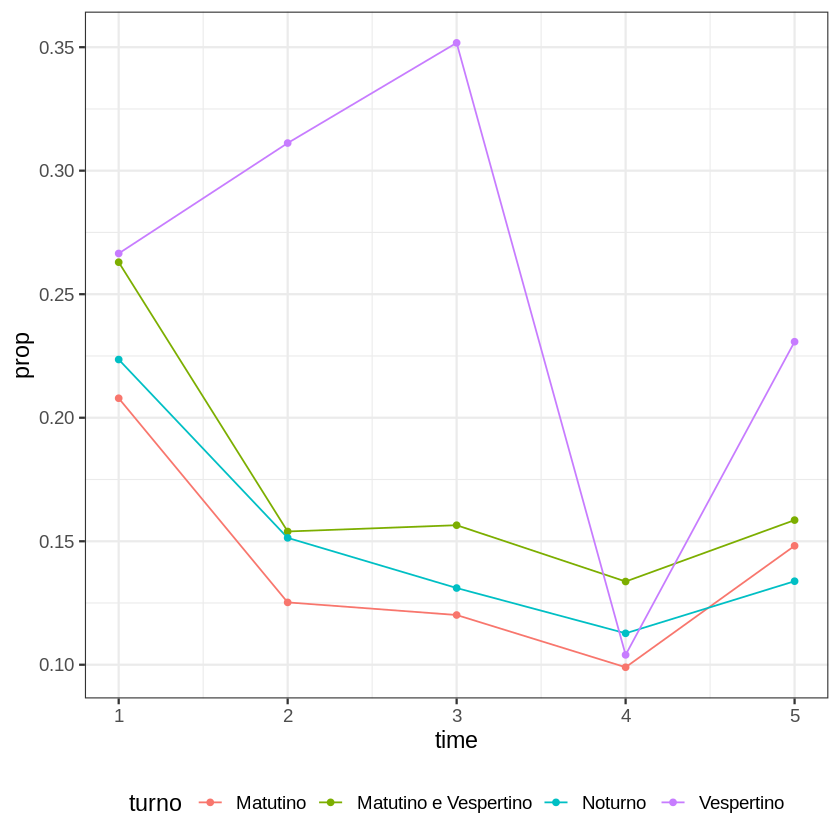

In [8]:
dados %>% group_by(time, turno) %>% summarize(prop=mean(event)) %>% ggplot(aes(x=time,
color=turno, y=prop)) + geom_line() + geom_point() + theme(legend.position = "bottom")

# Sexo

`summarise()` regrouping output by 'time' (override with `.groups` argument)



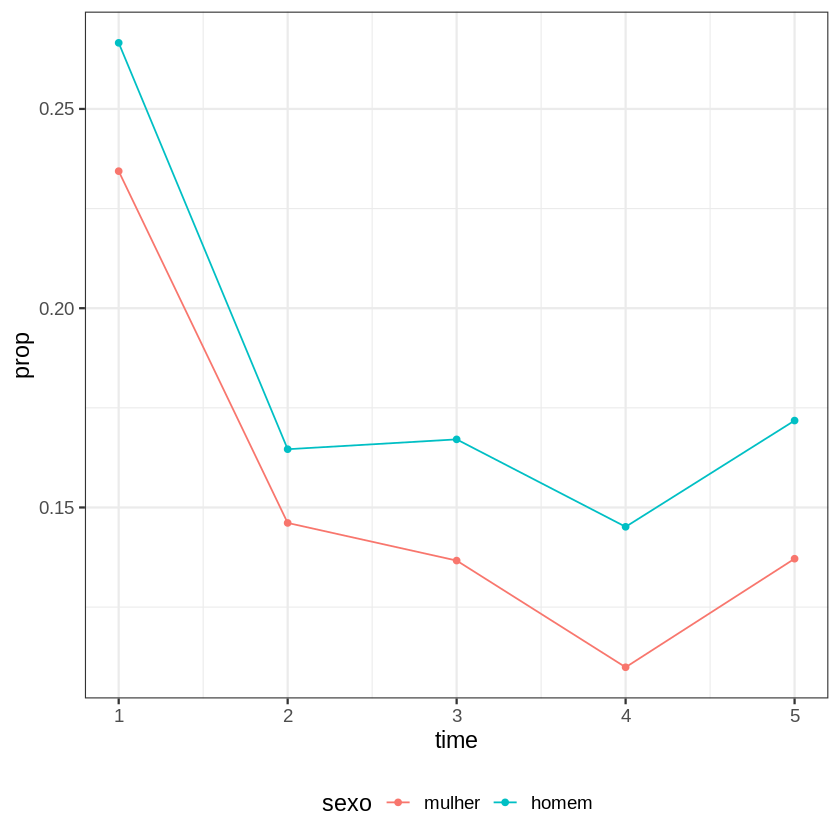

In [9]:
dados %>% group_by(time, sexo) %>% summarize(prop=mean(event)) %>% ggplot(aes(x=time,
color=sexo, y=prop)) + geom_line() + geom_point() + theme(legend.position = "bottom")

# Cotista

`summarise()` regrouping output by 'time' (override with `.groups` argument)



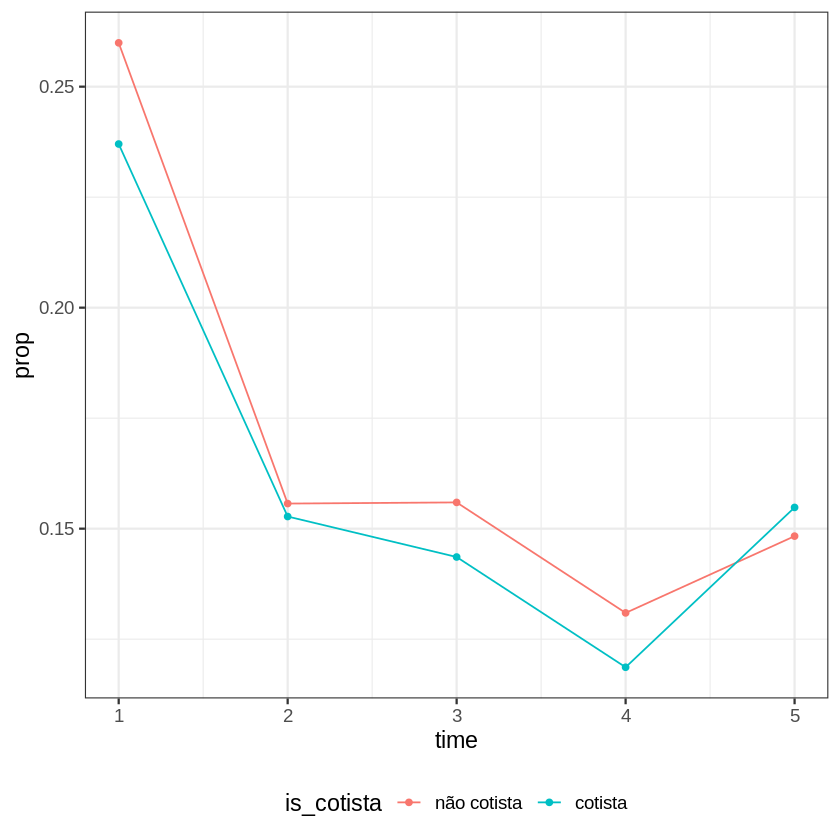

In [10]:
dados %>% group_by(time, is_cotista) %>% summarize(prop=mean(event)) %>% ggplot(aes(x=time,
color=is_cotista, y=prop)) + geom_line() + geom_point() + theme(legend.position = "bottom")

# gap: anoIngressoUFRB - anoConclusaoEnsinoMedio

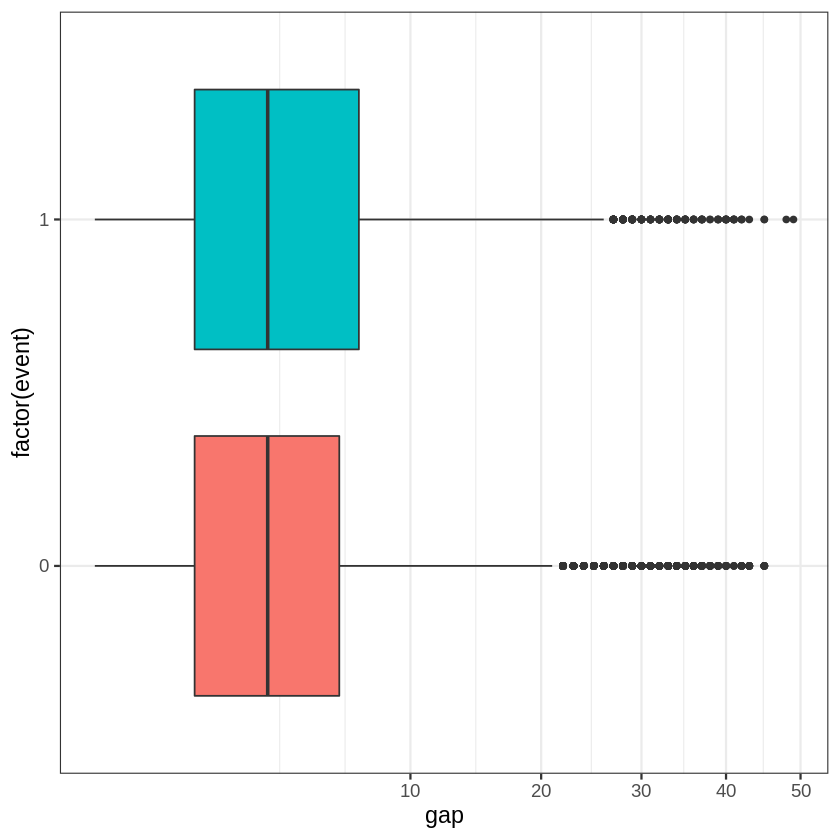

In [11]:
ggplot(dados, aes(y=gap, fill=factor(event), x=factor(event))) + geom_boxplot() +
scale_y_sqrt() + coord_flip() + theme(legend.position = "bottom") + guides(fill = FALSE)

# Idade

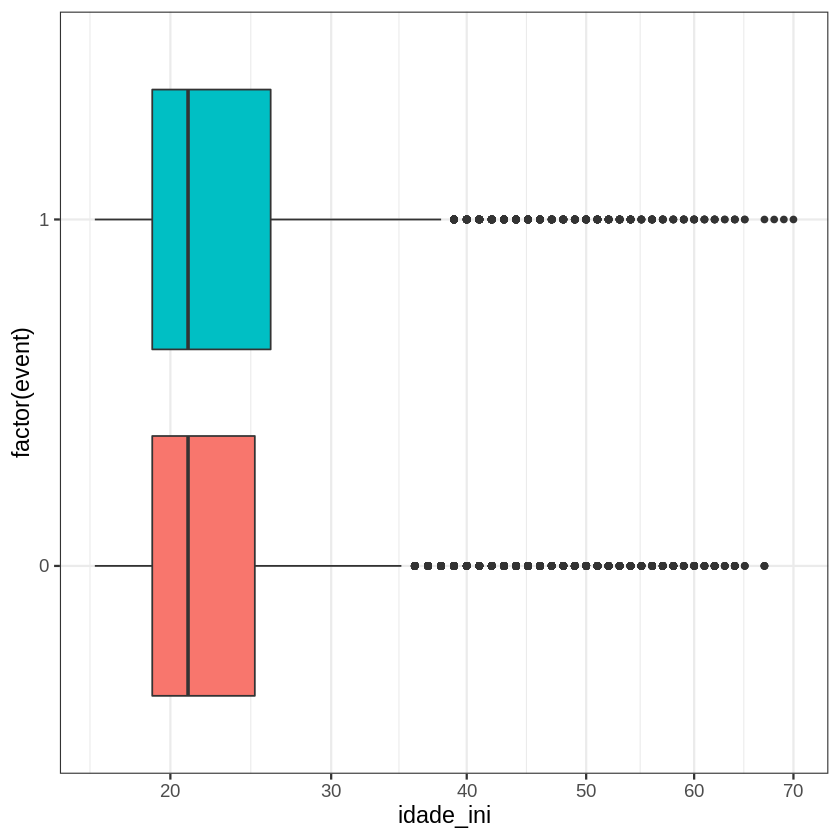

In [12]:
dados$idade[dados$idade<=15] <- NA
dados$idade[dados$idade>70] <- NA
dados <- dados %>% group_by(matricula) %>% mutate(idade_ini = min(idade, na.rm = TRUE))
ggplot(dados, aes(y=idade_ini, fill=factor(event), x=factor(event))) + geom_boxplot() +
scale_y_sqrt() + coord_flip() + theme(legend.position = "bottom") + guides(fill = FALSE)

# Porcentagem de reprovações por média

- porcetagem decresce para estudantes que não evadem

`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


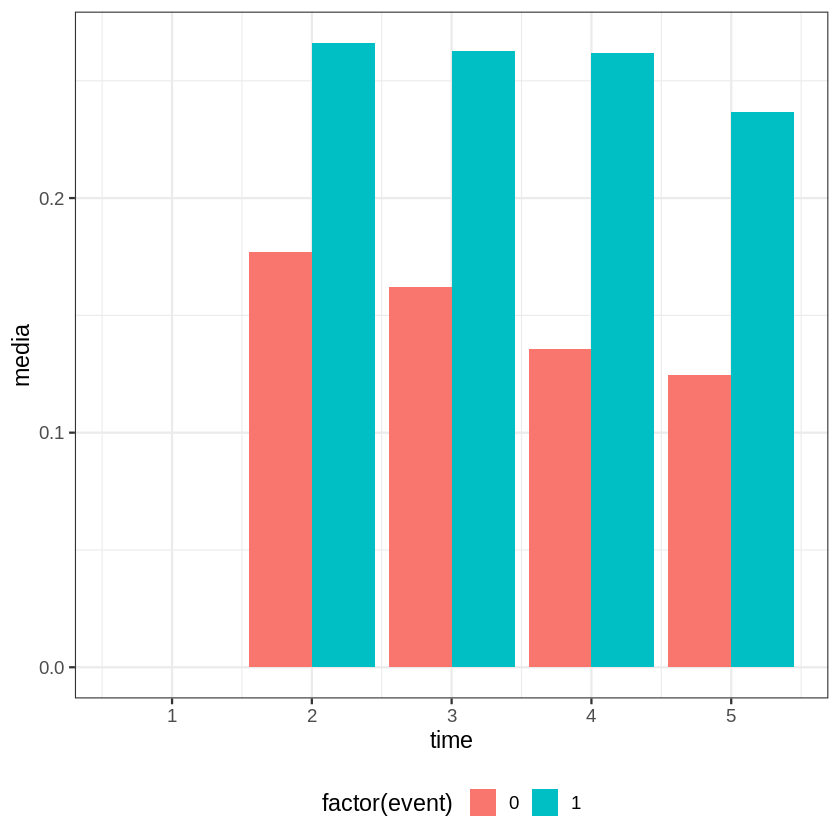

In [13]:
dados %>% group_by(time, event) %>% summarize(media=mean(p_n_rep)) %>% ggplot(aes(x=time, fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Porcentagem de reprovações por falta


`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


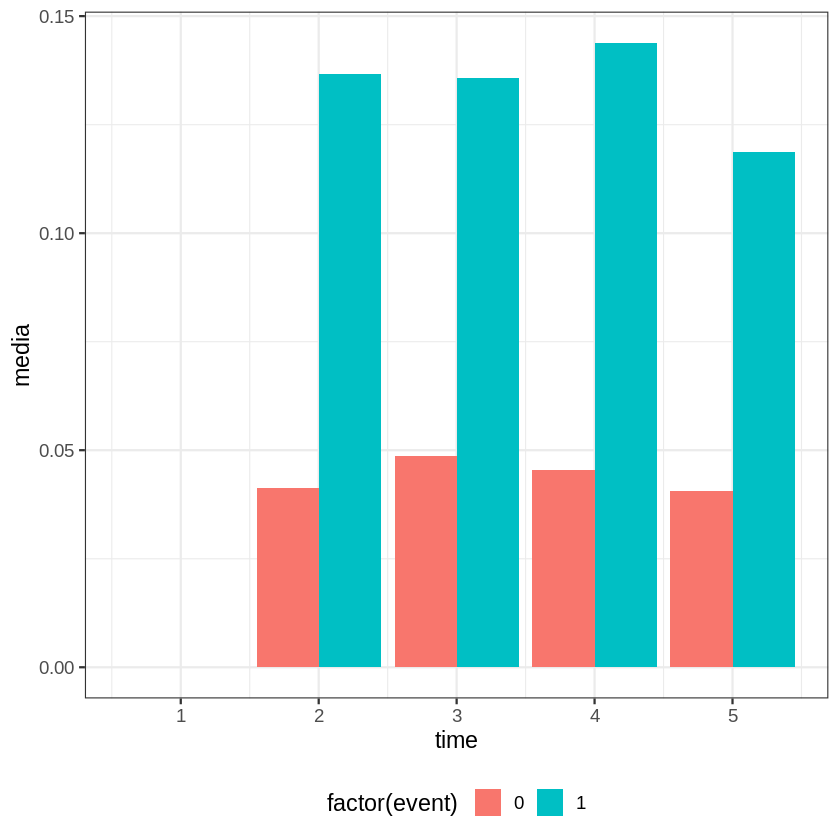

In [15]:
dados %>% group_by(time, event) %>% summarize(media=mean(p_n_repf)) %>% ggplot(aes(x=time, fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Porcentagem de aprovações


`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


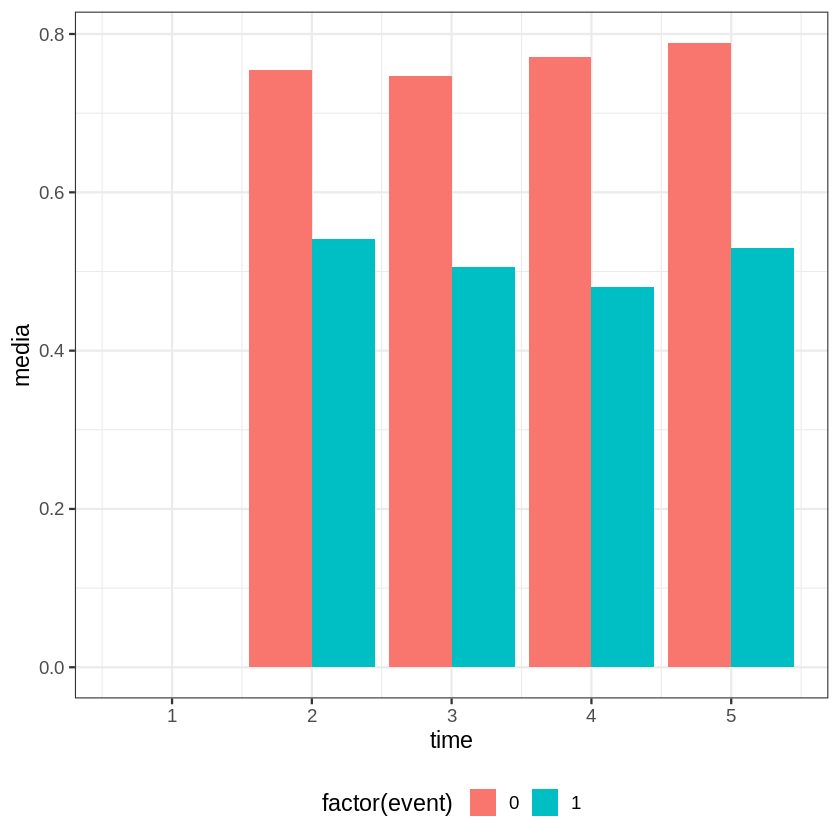

In [17]:
dados %>% group_by(time, event) %>% summarize(media=mean(p_n_apr)) %>% ggplot(aes(x=time, fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Porcentagem de trancamentos


`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


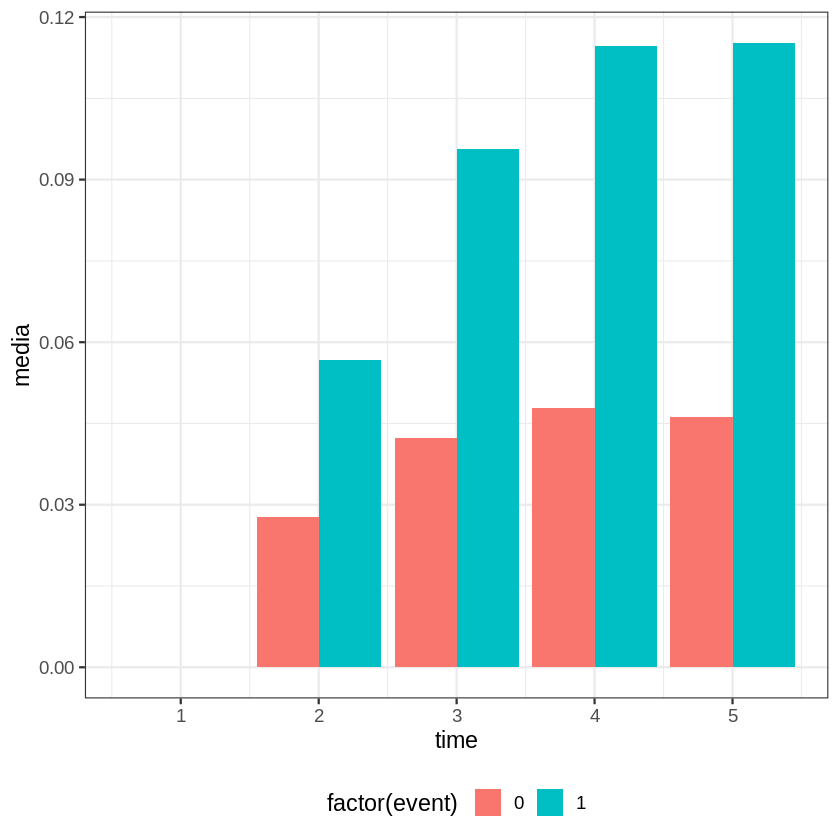

In [19]:
dados %>% group_by(time, event) %>% summarize(media=mean(p_n_tra)) %>% ggplot(aes(x=time, fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Índice de Rendimento Acadêmico

`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


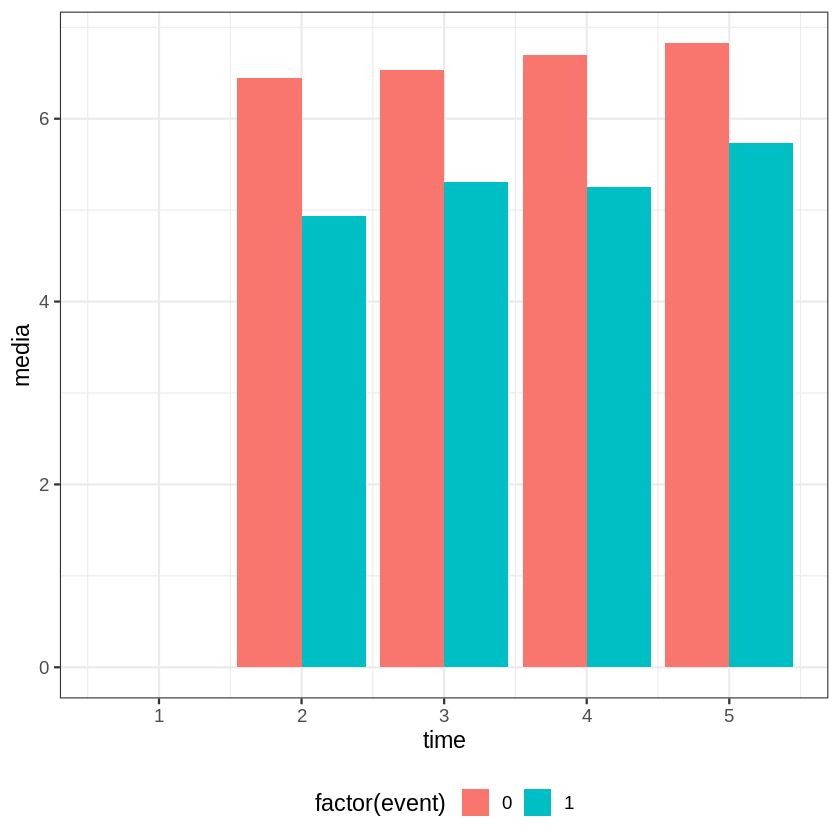

In [21]:
dados %>% group_by(time, event) %>% summarize(media=mean(ira)) %>% ggplot(aes(x=time,
fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Média Final por Semestre

`summarise()` regrouping output by 'time' (override with `.groups` argument)

Warning message:
“Removed 2 rows containing missing values (geom_col).”


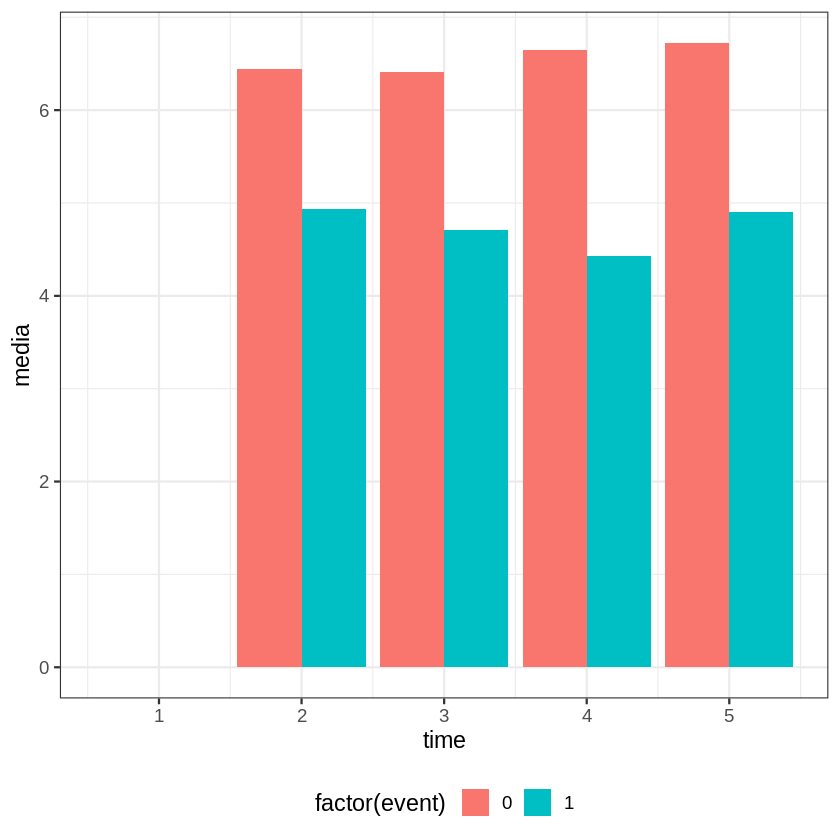

In [22]:
dados %>% group_by(time, event) %>% summarize(media=mean(mediaFinal)) %>% ggplot(aes(x=time,
fill=factor(event), y=media)) + geom_col(position="dodge") + theme(legend.position = "bottom")

# Modelo Marginal

## Modelo para o primeiro tempo V1

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



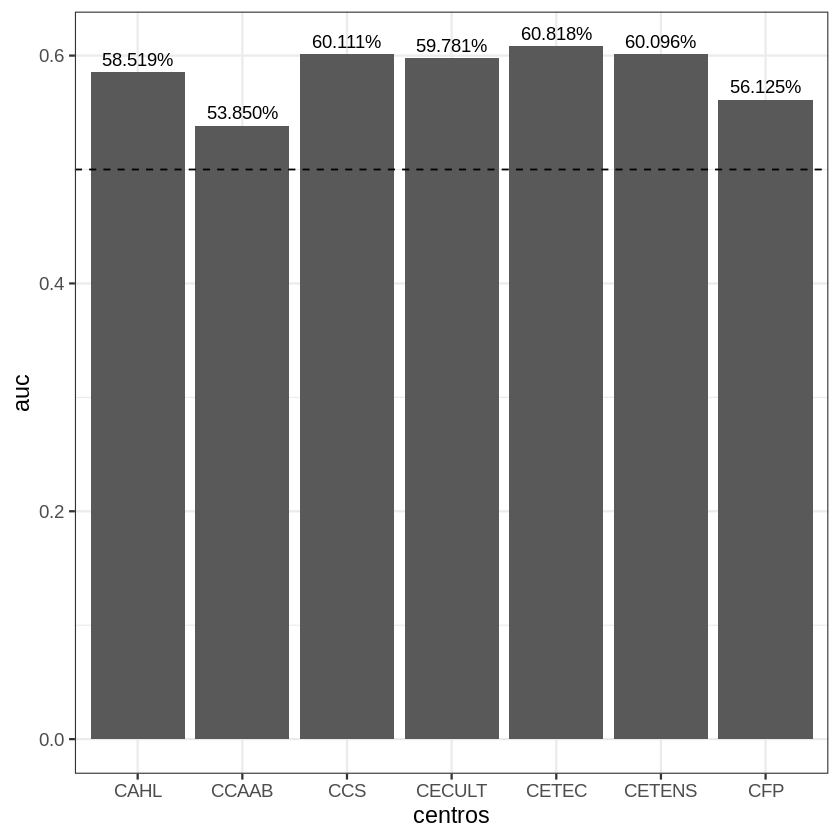

In [23]:
centros <- unique(dados$centro)

fits.glm <- list()
for(i in 1:length(centros))
{
    dados.centro <- subset(dados, time==1)
    dados.centro <- subset(dados.centro, centro == centros[i])    
    
    fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso, family = "binomial", data=dados.centro)
}

# auc
auc.fit.glm <- data.frame(centros = centros, auc = NA)
for(i in 1:length(centros)){
    auc.fit.glm$auc[i] <- roc(fits.glm[[i]]$y~fits.glm[[i]]$fitted.values)$auc
}

ggplot(auc.fit.glm, aes(x=centros, y=auc)) + 
geom_text(aes(label = scales::percent(auc)), vjust = -.5) +
geom_col() + 
geom_hline(yintercept = 0.5, linetype = "dashed")

## Modelo para o primeiro tempo V2

In [24]:
centros <- unique(dados$centro)

fits.glm <- list()
for(i in 1:length(centros))
{
    dados.centro <- subset(dados, time==1)
    dados.centro <- subset(dados.centro, centro == centros[i])
        
    if(length(unique(dados.centro$turno)) > 1){
       if(length(unique(dados.centro$grau)) > 1){
           fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso + grau + turno, family = "binomial", data=dados.centro)
       }else{
           fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso + turno, family = "binomial", data=dados.centro)
       }
    }else{
         if(length(unique(dados.centro$grau)) > 1){
             fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso + grau, family = "binomial", data=dados.centro)
         }else{
             fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso, family = "binomial", data=dados.centro)
         }
    }
    
#    fits.glm[[i]] <- glm(event ~ sexo + is_cotista + gap + idade + semestreIngresso, family = "binomial", data=dados.centro)
}

# auc
auc.fit.glm <- data.frame(centros = centros, auc = NA)
for(i in 1:length(centros)){
    auc.fit.glm$auc[i] <- roc(fits.glm[[i]]$y~fits.glm[[i]]$fitted.values)$auc
}

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



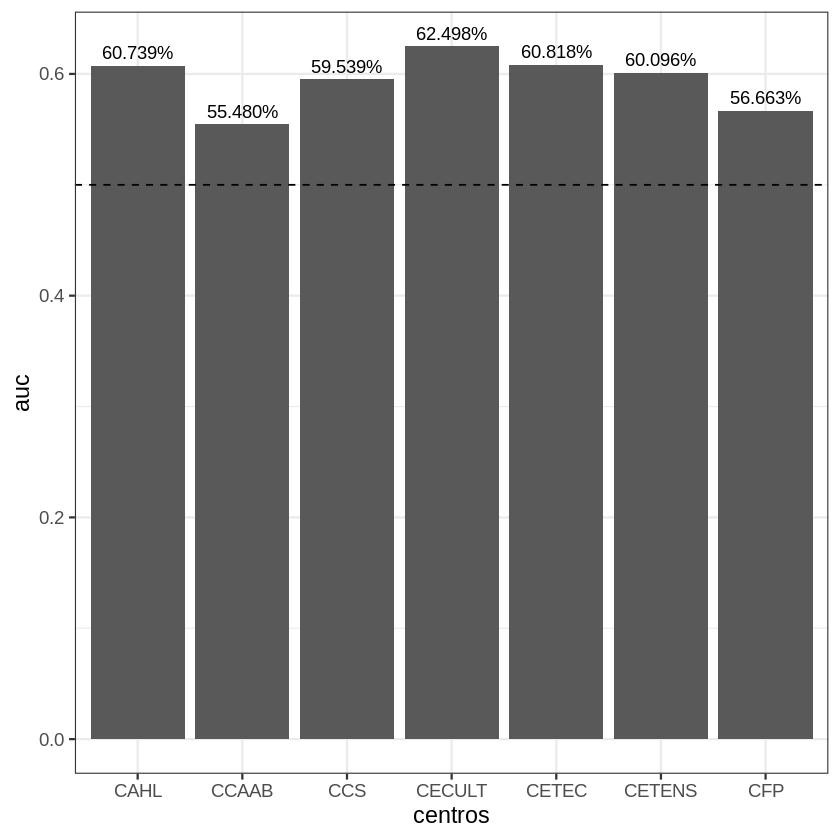

In [25]:
ggplot(auc.fit.glm, aes(x=centros, y=auc)) + 
geom_text(aes(label = scales::percent(auc)), vjust = -.5) +
geom_col() + 
geom_hline(yintercept = 0.5, linetype = "dashed")

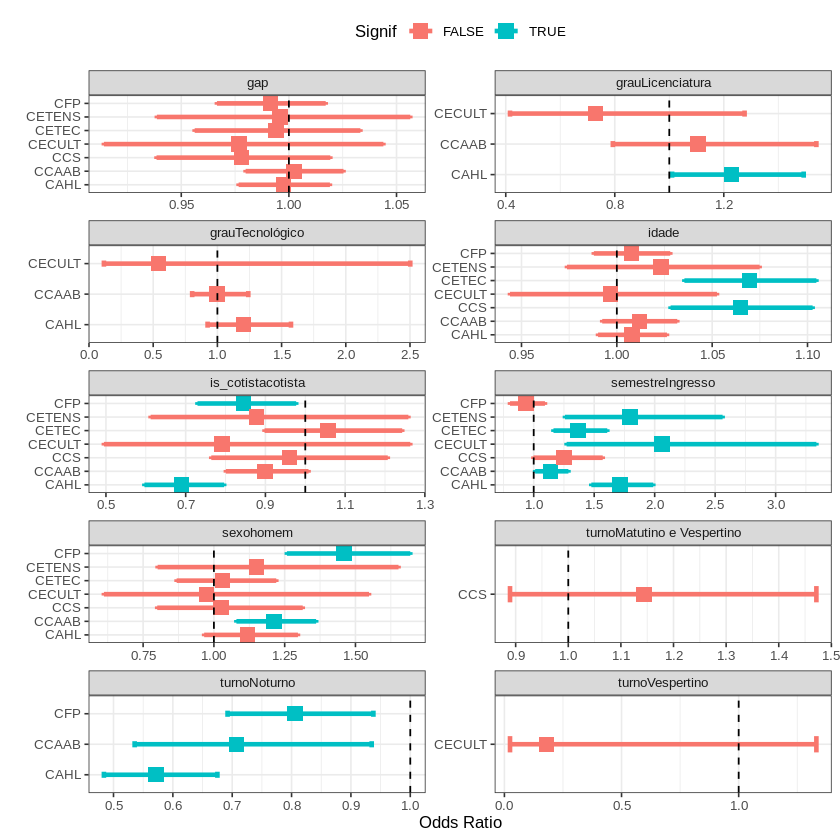

In [26]:
res.fit.glm <- list()

for(i in 1:length(centros)){
    res.fit.glm[[i]] <- data.frame(summary(fits.glm[[i]])$coef, centro = centros[i],
    vars = names(fits.glm[[i]]$coefficients))[-1, ]
}

res.fit.glm <- do.call(rbind, res.fit.glm)
res.fit.glm <- res.fit.glm %>% mutate(OR = exp(Estimate),
Lower = exp(Estimate-1.96*Std..Error),
Upper = exp(Estimate+1.96*Std..Error),
Signif = factor(I(Pr...z..<0.05)))


pd <- position_dodge(.4)

p <- ggplot(res.fit.glm, aes(x=centro, y=OR, color=Signif)) + 
geom_point(shape=15, size=4, position = pd) + 
geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2, size = 1.3, position = pd) + 
theme(axis.title = element_text(face = "bold")) +
geom_hline(yintercept = 1, linetype = "dashed") + 
labs(x="") + 
theme_bw(base_size=10) 

p + coord_flip() + 
theme(legend.position = "top") + 
labs(y="Odds Ratio") +
facet_wrap(~vars, ncol = 2, scales = "free")

## Modelo longitudinal - V1

In [27]:
centros <- unique(dados$centro)
fits.gee <- list()
for(i in 1:length(centros))
{
    dados.centro <- subset(dados, centro == centros[i])
    fits.gee[[i]] <- geeglm(event ~ factor(time) + sexo + is_cotista + gap + idade_ini +
    semestreIngresso + n_repf + n_apr + mediaFinal, corstr = "exch",
    family = "binomial", id=matricula, data=na.omit(dados.centro))
}

# auc
auc.fit.gee <- data.frame(centros = centros, auc = NA)
for(i in 1:length(centros)){
    auc.fit.gee$auc[i] <- roc(fits.gee[[i]]$y~fits.gee[[i]]$fitted.values)$auc
}

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: 

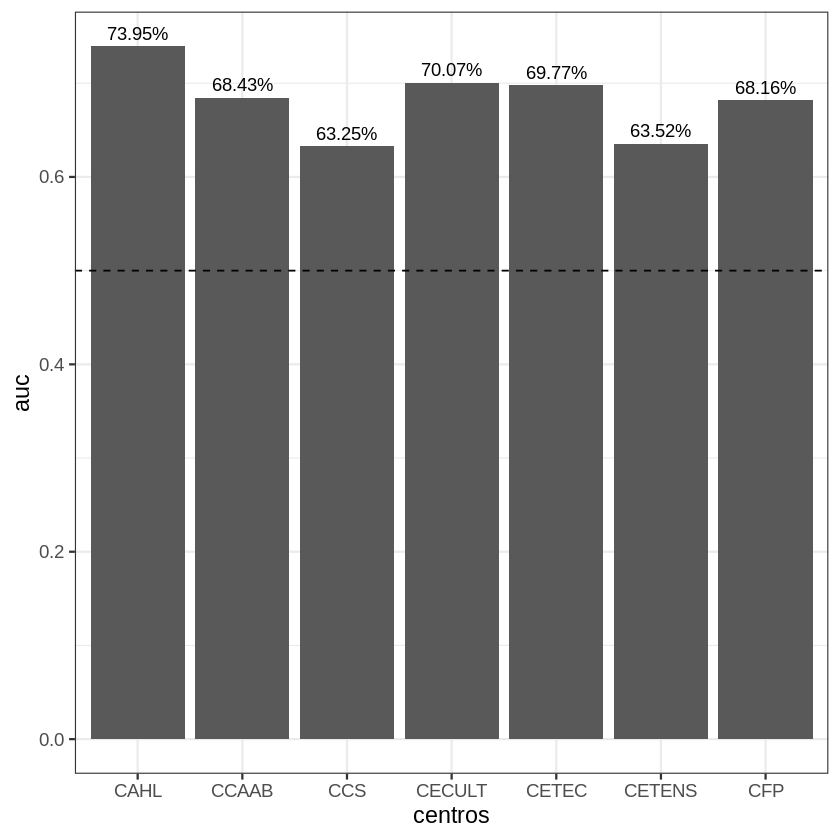

In [28]:
ggplot(auc.fit.gee, aes(x=centros, y=auc)) + 
geom_text(aes(label = scales::percent(auc)), vjust = -.5) +
geom_col() + 
geom_hline(yintercept = 0.5, linetype = "dashed")

In [29]:
res.fit.gee <- list()
for(i in 1:length(centros)){
    res.fit.gee[[i]] <- data.frame(summary(fits.gee[[i]])$coef, centro = centros[i],
    vars = names(fits.gee[[i]]$coefficients))[-1, ]
}

res.fit.gee <- do.call(rbind, res.fit.gee)
res.fit.gee <- res.fit.gee %>% mutate(OR = exp(Estimate),
Lower = exp(Estimate-1.96*Std.err),
Upper = exp(Estimate+1.96*Std.err),
Signif = factor(I(Pr...W..<0.05)))

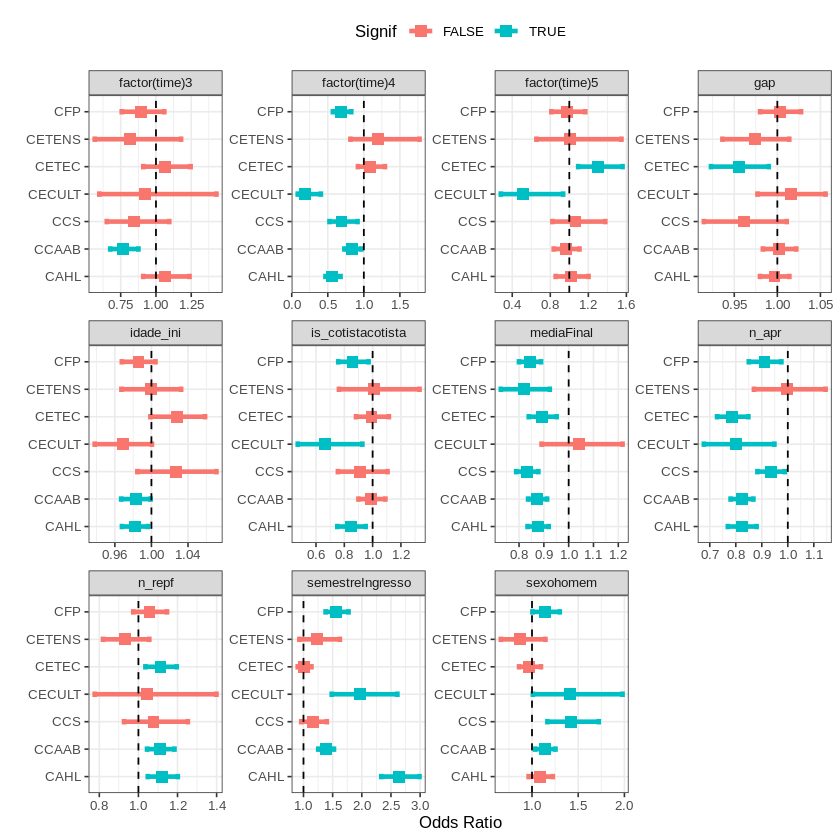

In [30]:
pd <- position_dodge(.4)
p <- ggplot(res.fit.gee, aes(x=centro, y=OR, color=Signif)) + 
geom_point(shape=15, size=3, position = pd) + 
geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2, size = 1.3, position = pd) + 
theme(axis.title = element_text(face = "bold")) +
geom_hline(yintercept = 1, linetype = "dashed") + labs(x="") + 
theme_bw(base_size=10)

p + coord_flip() + theme(legend.position = "top") + labs(y="Odds Ratio") +
facet_wrap(~vars, ncol = 4, scales = "free")

### Modelo Longitudinal - V2

In [31]:
centros <- unique(dados$centro)
fits.gee <- list()
for(i in 1:length(centros))
{
    dados.centro <- subset(dados, centro == centros[i])
    #print(centros[i])
    #print(unique(dados.centro$turno))
    #print(unique(dados.centro$grau))
    
    if(length(unique(dados.centro$turno)) > 1){
       if(length(unique(dados.centro$grau)) > 1){
           fits.gee[[i]] <- geeglm(event ~ factor(time) + sexo + is_cotista + gap + 
                                   semestreIngresso + p_n_tra + ira + factor(grau) + factor(turno), corstr = "exch",
                                   family = "binomial", id=matricula, data=na.omit(dados.centro))
       }else{
           fits.gee[[i]] <- geeglm(event ~ factor(time) + sexo + is_cotista + gap + 
                                   semestreIngresso + p_n_tra + ira + factor(turno), corstr = "exch",
                                   family = "binomial", id=matricula, data=na.omit(dados.centro))           
       }
    }else{
         if(length(unique(dados.centro$grau)) > 1){
           fits.gee[[i]] <- geeglm(event ~ factor(time) + sexo + is_cotista + gap + 
                                   semestreIngresso + p_n_tra + ira + factor(grau), corstr = "exch",
                                   family = "binomial", id=matricula, data=na.omit(dados.centro))             
         }else{
             fits.gee[[i]] <- geeglm(event ~ factor(time) + sexo + is_cotista + gap +
                                     semestreIngresso + p_n_tra + ira, corstr = "exch",
                                     family = "binomial", id=matricula, data=na.omit(dados.centro))             
         }
    }
}

# auc
auc.fit.gee <- data.frame(centros = centros, auc = NA)
for(i in 1:length(centros)){
    auc.fit.gee$auc[i] <- roc(fits.gee[[i]]$y~fits.gee[[i]]$fitted.values)$auc
}


Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: 

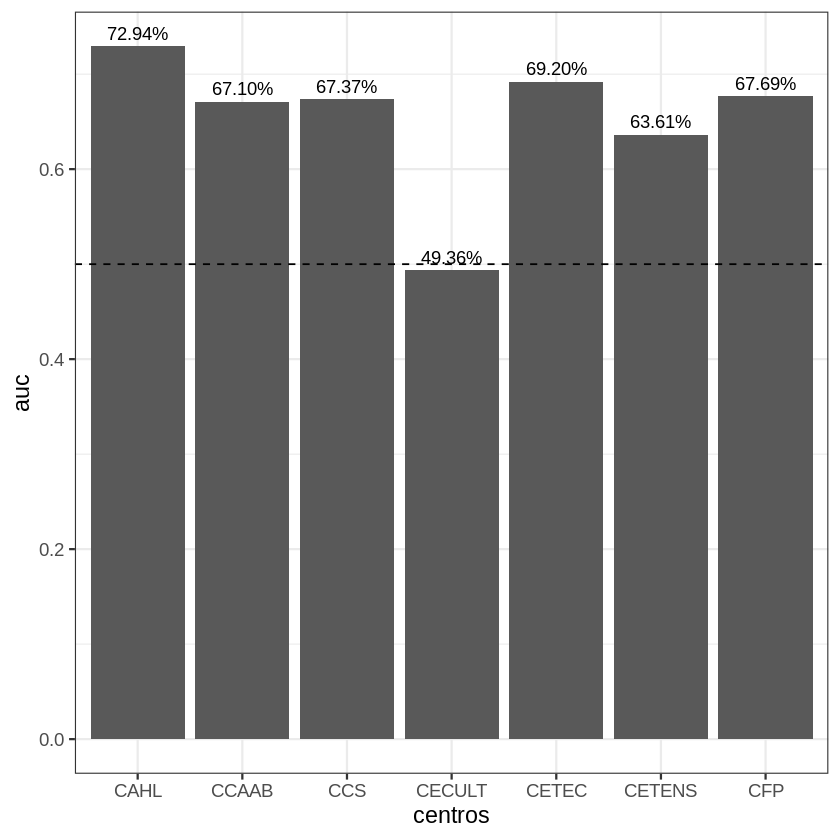

In [32]:
ggplot(auc.fit.gee, aes(x=centros, y=auc)) + 
geom_text(aes(label = scales::percent(auc)), vjust = -.5) +
geom_col() + 
geom_hline(yintercept = 0.5, linetype = "dashed")

In [33]:
res.fit.gee <- list()
for(i in 1:length(centros)){
    res.fit.gee[[i]] <- data.frame(summary(fits.gee[[i]])$coef, centro = centros[i],
    vars = names(fits.gee[[i]]$coefficients))[-1, ]
}

res.fit.gee <- do.call(rbind, res.fit.gee)
res.fit.gee <- res.fit.gee %>% mutate(OR = exp(Estimate),
Lower = exp(Estimate-1.96*Std.err),
Upper = exp(Estimate+1.96*Std.err),
Signif = factor(I(Pr...W..<0.05)))

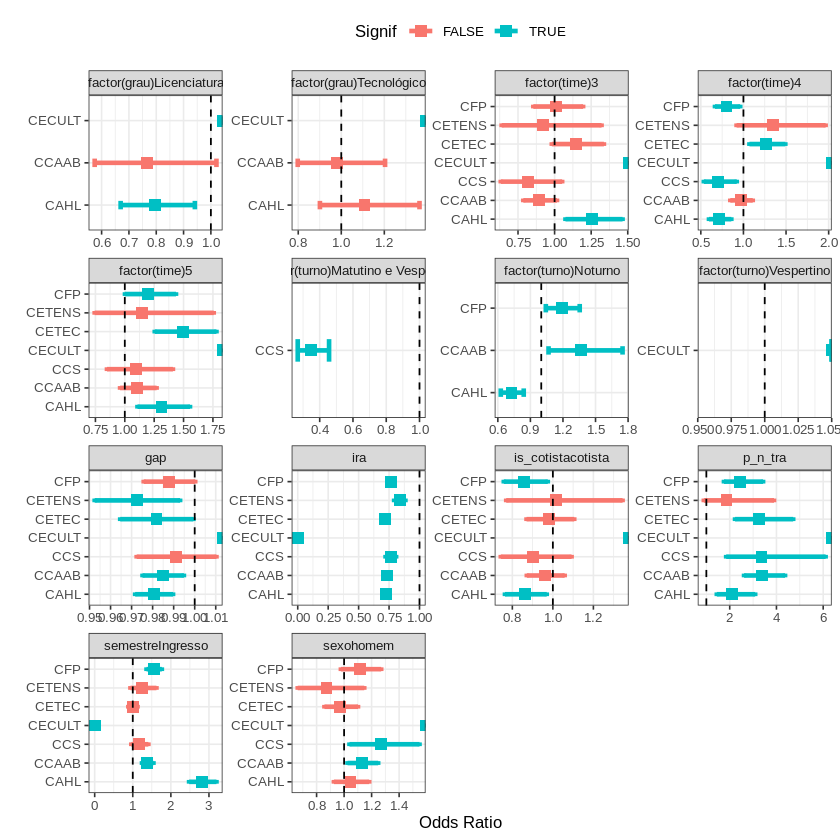

In [34]:
pd <- position_dodge(.4)
p <- ggplot(res.fit.gee, aes(x=centro, y=OR, color=Signif)) + 
geom_point(shape=15, size=3, position = pd) + 
geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2, size = 1.3, position = pd) + 
theme(axis.title = element_text(face = "bold")) +
geom_hline(yintercept = 1, linetype = "dashed") + labs(x="") + 
theme_bw(base_size=10)

p + coord_flip() + theme(legend.position = "top") + labs(y="Odds Ratio") +
facet_wrap(~vars, ncol = 4, scales = "free")

## Modelo para primeiro tempo v2: 
- AUC reduziu para CECULT
- turno Noturno é significativo para três centros de ensino, enquanto Matutino e Vespertino é significativo para CCS
- taxa de trancamento (p_n_tra) é signficativo para todos os centros exceto CETENS
- grau Licenciatura é significativo para CAHL